In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
import torchvision
from torchvision import transforms 



In [24]:
data_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]) #0~255 into 0~1

mnist_train = torchvision.datasets.MNIST(root='./temp', train=True, transform=None, download=True)
mnist_test = torchvision.datasets.MNIST(root='./temp', train=False, transform=None, download=True)

In [25]:
index = 59999

image, label = mnist_train[index]
print("不做transform的資料型態:",type(image))
image

不做transform的資料型態: <class 'PIL.Image.Image'>


In [26]:
data_transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
# 0~255 into 0~1.的矩陣
mnist_train = torchvision.datasets.MNIST(root='./temp', train=True, transform=data_transform, download=True)
mnist_test = torchvision.datasets.MNIST(root='./temp', train=False, transform=data_transform, download=True)

In [27]:
index = 59999
image, label = mnist_train[index] 
print(image.shape)
print(image) #transform以後的數據

torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

資料型態轉換後: <class 'numpy.ndarray'>
8
(1, 28, 28)
(28, 28)


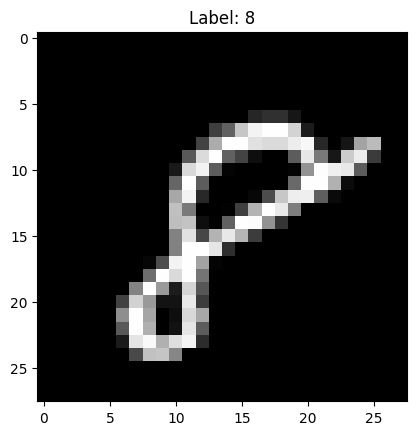

In [28]:
########### 需將tensor轉成numpy才能用matplotlib畫圖 ################
image_np = image.numpy()
print("資料型態轉換後:",type(image_np))
######################################################################

print(label)
print(image_np.shape)
print(image_np.squeeze(0).shape)

plt.imshow(image_np.squeeze(0), cmap='gray')
plt.title(f"Label: {label}")
plt.show()

In [29]:
XX_train = []
YY_train = []

for i in range(len(mnist_train)):
  XX_train.append(mnist_train[i][0].numpy().squeeze(0)) # (1,28,28)squeeze掉第一個變(28,28)再去堆疊
  YY_train.append(mnist_train[i][1]) # 第二個[1]是取mnist_train的label 若為[0]則是取image
XX_train = np.array(XX_train) # 將資料型態轉換為np.array
YY_train = np.array(YY_train)

print(XX_train.shape)
print(YY_train.shape)

(60000, 28, 28)
(60000,)


In [30]:
XX_test = []
YY_test = []
for i in range(len(mnist_test)):
  XX_test.append(mnist_test[i][0].numpy().squeeze(0))
  YY_test.append(mnist_test[i][1])
XX_test = np.array(XX_test)
YY_test = np.array(YY_test)

print(XX_test.shape)
print(YY_test.shape)

# print(XX_test[0][7][6])
print(XX_test.shape[1])

(10000, 28, 28)
(10000,)
28


In [31]:
#找先驗機率 p(y = i)
n_y = np.zeros(10)

for i in range(10):
  #TO DO : 算出每個label的總數
  for j in range(len(YY_train)):
    if YY_train[j] == i: # 若YY_train第j項=i(數字0~9) 則n_y的第i項+1
      n_y[i] += 1

print("n_y:",n_y)
print("n_y.sum:",n_y.sum())

P_y = n_y / n_y.sum()

print(P_y)
print(P_y[1])
print(type(P_y))


n_y: [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
n_y.sum: 60000.0
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]
0.11236666666666667
<class 'numpy.ndarray'>


In [32]:
#訓練 p(x(i)|y), i=0~9
n_x = np.zeros((10, 28, 28))
# 將label y=i 的x的每一格(28*28)的灰階數值(?/255)相加
for i in range(10): # 把YY_train == i的XX_train相加起來
    n_x[i] = (XX_train[YY_train == i].sum(axis=0)) # axis=0: sum of row, axis=1: sum of column
print(n_x[0])

#xd出現次數/y=i, P_xy = p(x(i)|y), 我覺得應該是各點的期望值灰階
P_xy = (n_x + 1) / (n_y).reshape(10, 1, 1) # 我猜n_x+1是為了不讓有偏差時各項的機率皆為0
print(P_xy.shape)
print(type(P_xy))

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.01960814e-01
  9.92156863e-01 4.07843143e-01 0.00000000e+00 3.52941185e-01
  9.64705884e-01 4.58823532e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.13725491e-01
  3.92156877e-02 0.00000000e+00 3.33333343e-01 7.84313738e-01
  1.72

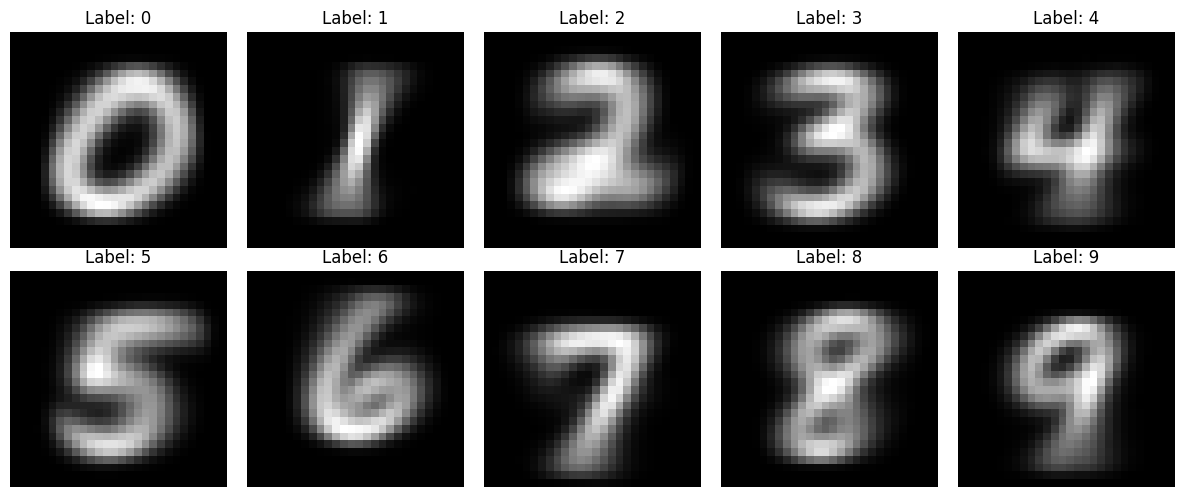

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(P_xy[i], cmap='gray')
    axes[i].set_title(f"Label: {i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [34]:
threshold = 0.15
def bayes_pred_stable(x):
    #TO DO 寫出Naive Bayes 公式
    py = np.zeros(10)
    for j in range(len(P_xy)): # in range 10
        for r in range(28): # 28
            for c in range(28): # 28
                if x[r][c] > threshold:
                    py[j] += np.log(P_xy[j][r][c])
                else:
                    py[j] += np.log(1-P_xy[j][r][c])
        py[j] = py[j] * P_y[j]
    return py        
     

def predict(X):
    return [np.argmax(bayes_pred_stable(x)) for x in X]

index = 555
image = XX_test[index]
label = YY_test[index]
print(image.shape)
py = bayes_pred_stable(image)
print(py)
print('y_true ', label, 'y_hat ', np.argmax(py))
print(predict([image]))


(28, 28)
[-26.06162057 -35.16512954 -21.69808727 -25.62466234 -14.43590266
 -18.26040383 -22.04324017 -21.21040832 -17.90972046 -16.9701392 ]
y_true  4 y_hat  4
[4]


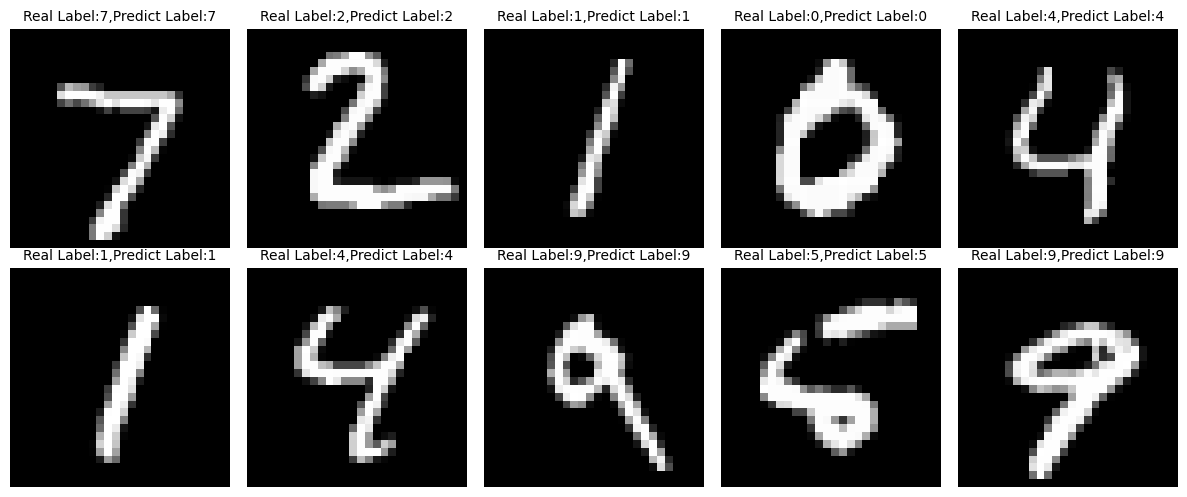

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    py = bayes_pred_stable(XX_test[i])
    axes[i].imshow(XX_test[i], cmap='gray')
    axes[i].set_title(f"Real Label:{YY_test[i]},Predict Label:{np.argmax(py)}", fontsize = 10)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [36]:
preds = predict(XX_test)
float((preds == YY_test).sum()) / len(YY_test)  # test accuracy

0.8204

In [37]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
原圖像素 (1280, 1280)


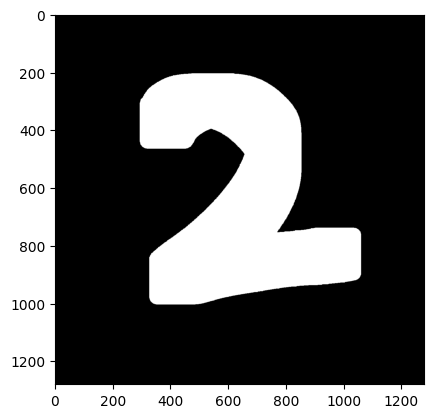

In [74]:
testphoto2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)

# 查看資料型態
print(type(testphoto2))

#檢查一下陣列的大小
print('原圖像素',testphoto2.shape)
plt.imshow(testphoto2, cmap="gray")

(28, 28)


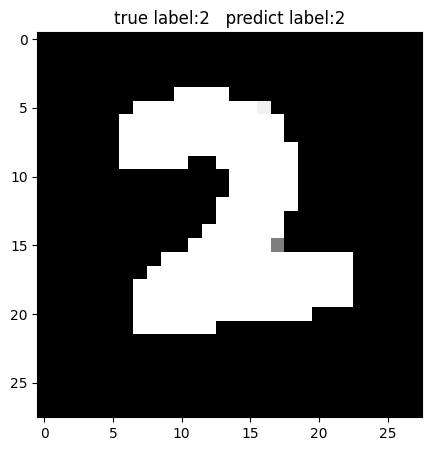

In [75]:
testphoto2 = cv2.resize(testphoto2, (28, 28))

print(testphoto2.shape)
predict_label2 = predict([testphoto2])
# print((predict_label2))

plt.title(f'true label:2   predict label:{predict_label2[0]}')
plt.imshow(testphoto2, cmap="gray")



原圖像素 (733, 506)
366.5


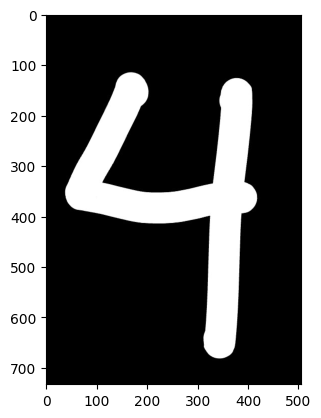

In [85]:
testphoto4 = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE)

print('原圖像素',testphoto4.shape)
plt.imshow(testphoto4, cmap="gray")


In [86]:
padding_left = 120
padding_right = 107
testphoto4_padded = cv2.copyMakeBorder(testphoto4, 0, 0, padding_left, padding_right, cv2.BORDER_CONSTANT, value=0)

(28, 28)


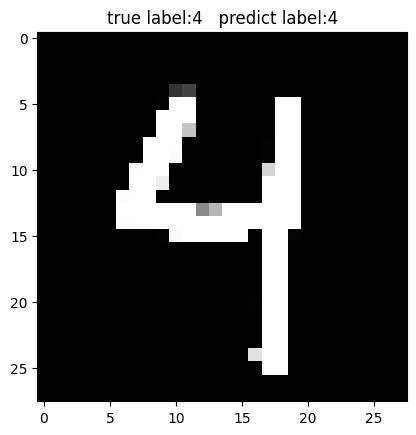

In [88]:
testphoto4_padded = cv2.resize(testphoto4_padded, (28, 28))

print(testphoto4_padded.shape)
predict_label4 = predict([testphoto4_padded])

plt.title(f'true label:4   predict label:{predict_label4[0]}')
plt.imshow(testphoto4_padded, cmap="gray")

原圖像素 (390, 312)


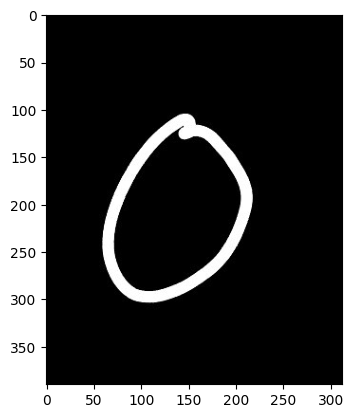

In [89]:
testphoto0 = cv2.imread('0.jpg', cv2.IMREAD_GRAYSCALE)

print('原圖像素',testphoto0.shape)
plt.imshow(testphoto0, cmap="gray")

In [103]:
padding_left = 58
padding_right = 20
testphoto0_padded = cv2.copyMakeBorder(testphoto0, 0, 0, padding_left, padding_right, cv2.BORDER_CONSTANT, value=0)
testphoto0_padded_2 = testphoto0_padded[40:370, 30:360]

(28, 28)


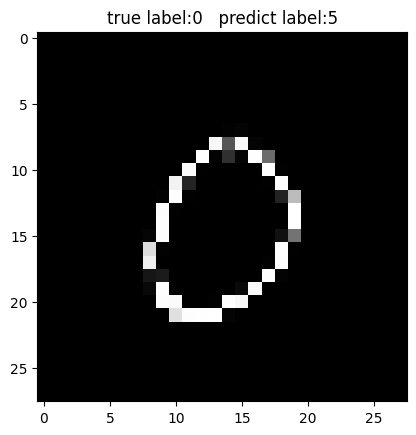

In [104]:
testphoto0_padded = cv2.resize(testphoto0_padded, (28, 28))

print(testphoto0_padded.shape)
predict_label0 = predict([testphoto0_padded])

plt.title(f'true label:0   predict label:{predict_label0[0]}')
plt.imshow(testphoto0_padded, cmap="gray")

(28, 28)


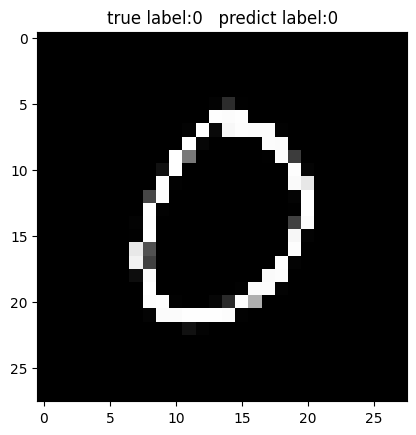

In [106]:
testphoto0_padded_2 = cv2.resize(testphoto0_padded_2, (28, 28))

print(testphoto0_padded_2.shape)
predict_label0 = predict([testphoto0_padded_2])

plt.title(f'true label:0   predict label:{predict_label0[0]}')
plt.imshow(testphoto0_padded_2, cmap="gray")